In [52]:
import os
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline


In [12]:
path = "/science/projects/imau01/rapid/RACMO2.3p2"
pathGreenland5_5 = path + "/FGRN055"

In [36]:
grid_size = "FGRN055"
downscaling_type = "BN_RACMO2.3p2_ERA5_3h_FGRN055"
time_resolution = "Annual"
year = "2018"
other_var = "NC_MD"


In [37]:
path_variables = os.path.join(path, grid_size, 
                              downscaling_type, time_resolution, 
                              other_var
                             )
print(path_variables)

/science/projects/imau01/rapid/RACMO2.3p2/FGRN055/BN_RACMO2.3p2_ERA5_3h_FGRN055/Annual/NC_MD


In [39]:
listFiles = []
for name in os.listdir(os.path.join(path_variables)):
    print(name)
    listFiles.append(name)

Annual
YYYY
evap.1990.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1991.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1992.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1993.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1994.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1995.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1996.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1997.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1998.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.1999.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2000.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2001.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2002.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2003.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2004.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2005.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2006.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2007.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc
evap.2008.FGRN05

In [40]:
# Assuming listFiles is already populated with filenames
files_containing_2018_runoff = []

for filename in listFiles:
    if "2018" in filename and "runoff" in filename:
        files_containing_2018_runoff.append(filename)

print("Files containing '2018' and 'runoff':")
for file in files_containing_2018_runoff:
    print(file)

Files containing '2018' and 'runoff':
runoff.2018.FGRN055_BN_RACMO2.3p2_ERA5_3h_FGRN055.YY.nc


In [46]:
ds = xr.open_dataset(os.path.join(path_variables, file))

In [49]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, height: 1, nblock1: 40, nblock2: 400, rlat: 566, rlon: 438, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2018-07-02
  * rlon       (rlon) float64 -10.05 -10.0 -9.95 -9.9 ... 11.65 11.7 11.75 11.8
  * rlat       (rlat) float64 -14.4 -14.35 -14.3 -14.25 ... 13.75 13.8 13.85
  * height     (height) float64 0.0
Dimensions without coordinates: bnds, nblock1, nblock2
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    assigned   (time) int32 ...
    block1     (nblock1) int32 ...
    block2     (nblock2) int32 ...
    dir        (rlat, rlon) float64 ...
    hms_bnds   (time, bnds) int32 ...
    lat        (rlat, rlon) float64 ...
    lon        (rlat, rlon) float64 ...
    runoff     (time, height, rlat, rlon) float64 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.4 (http://m...
    source:                    RACMO2
    institution:               Royal Netherlands Meteorological Institut

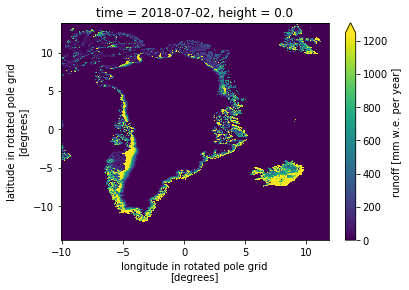

In [54]:
ds['runoff'].isel(time=0, height=0).plot(robust=True)